In [1]:
%pylab inline
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


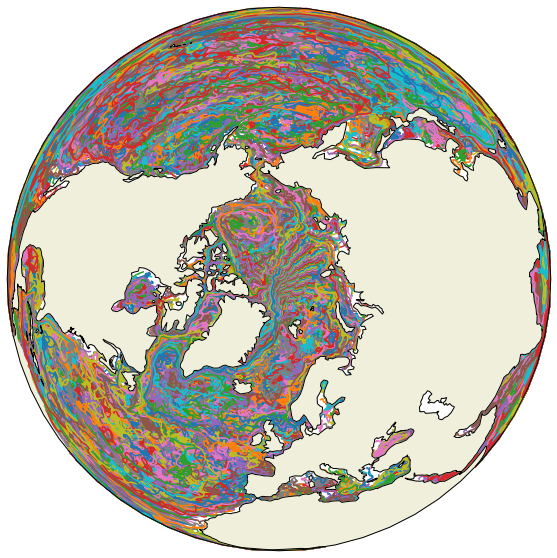

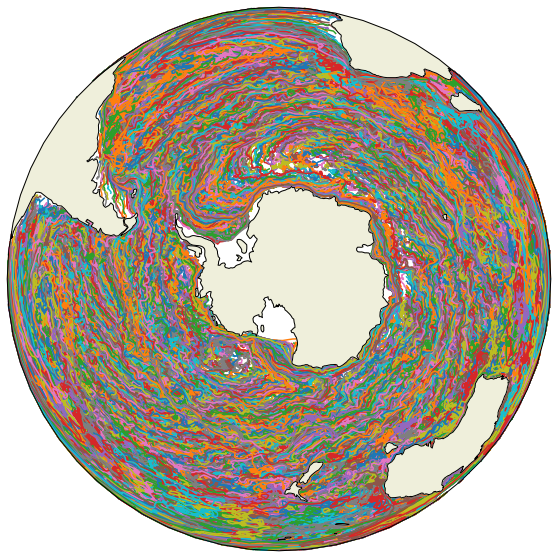

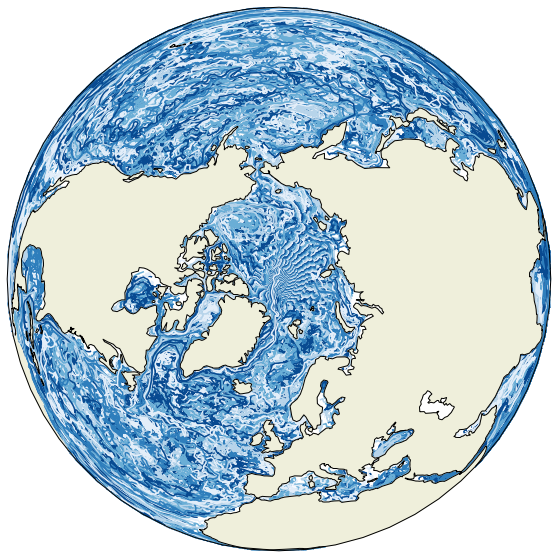

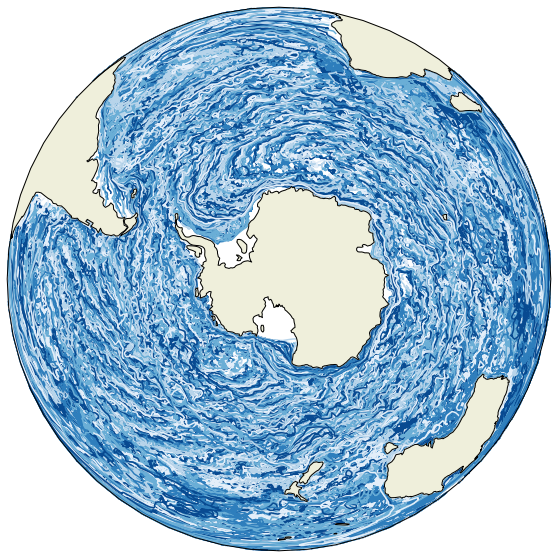

In [3]:
for color in ['defaultcolors', 'bluecolors']:
    for name, proj_lat in zip(['NH', 'SH'], [90, -90]):

        pylab.rcParams['figure.figsize'] = (10, 10)
        fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy.crs.Orthographic(0, proj_lat)})
        ax.coastlines(zorder=3)
        ax.add_feature(cartopy.feature.LAND, zorder=2)
        if color == 'bluecolors':
            ax.set_prop_cycle(color=[cm.Blues(i) for i in np.arange(0.1, 1.0, 0.2)])

        pfile = xr.open_dataset('Data/medusarun.nc', decode_cf=True)
        lon = np.ma.filled(pfile.variables['lon'], np.nan)
        lat = np.ma.filled(pfile.variables['lat'], np.nan)
        pfile.close()

        plt.plot(lon.T, lat.T, transform=cartopy.crs.Geodetic())
        savefig('cover_%s_%s.pdf' % (name, color))
        plt.show()